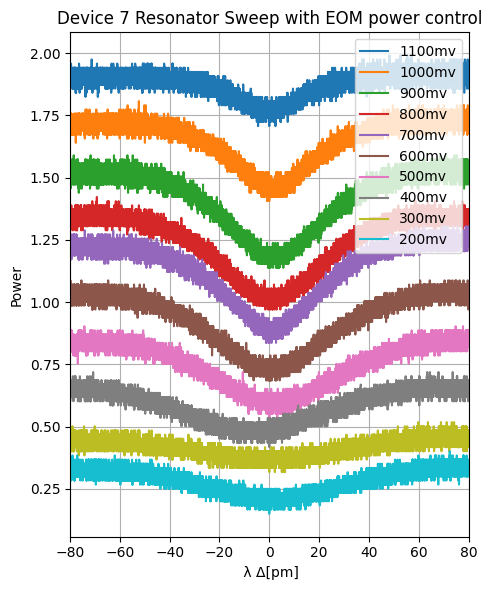

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

FILES = [
    'd7-1100mv.csv',
    'd7-1000mv.csv',
    'd7-900mv.csv',
    'd7-800mv.csv',
    'd7-700mv.csv',
    'd7-600mv.csv',
    'd7-500mv.csv',
    'd7-400mv.csv',
    'd7-300mv.csv',
    'd7-200mv.csv'
]

TIME_RANGES = [
    (-1, None),
    (-1, None),
    (-1, None),
    (-2.5, 1.5),
    (-1, None),
    (-1.5, None),
    (-2, None),
    (-2, None),
    (None, 2),
    (-1.5, None)
]

channel = 'Volt'
SEC_TO_PM = 50  # 1 sec = 50 pm

fig, ax = plt.subplots(figsize=(10, 6))  # figure size normal

for file, (tmin, tmax) in zip(FILES, TIME_RANGES):
    df = pd.read_csv(file, header=1)

    if tmin is not None:
        df = df[df['second'] >= tmin]
    if tmax is not None:
        df = df[df['second'] <= tmax]

    if df.empty:
        print(f"⚠️ Skipping {file}")
        continue

    t0 = df.loc[df[channel].idxmin(), 'second']
    time_centered = (df['second'] - t0) * SEC_TO_PM  # convert to pm

    label = file.replace('d7-', '').replace('.csv', '').lower()

    ax.plot(time_centered, df[channel], label=label)

ax.set_xlabel(' λ Δ[pm]')
ax.set_ylabel('Power')
ax.set_title('')
ax.grid(True)
ax.legend(loc='upper left')

# Vertically stretch the axes
ax.set_aspect(aspect=100)  # smaller number → taller vertical scaling
ax.legend(loc='upper right') 

plt.title('Device 7 Resonator Sweep with EOM power control')
plt.xlim(-80,80)
plt.tight_layout()
plt.show()


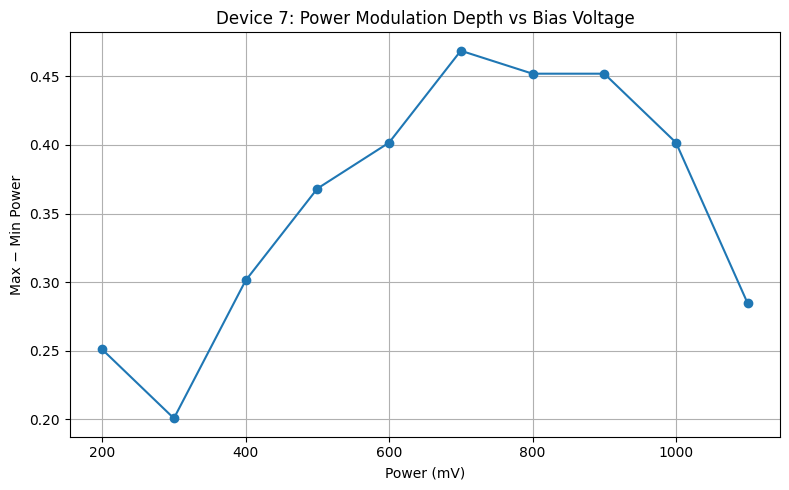

In [ ]:
channel = 'Volt'

bias_vals = []
delta_vals = []

for file, (tmin, tmax) in zip(FILES, TIME_RANGES):
    df = pd.read_csv(file, header=1)

    if tmin is not None:
        df = df[df['second'] >= tmin]
    if tmax is not None:
        df = df[df['second'] <= tmax]

    if df.empty:
        print(f"⚠️ Skipping {file}")
        continue

    vmax = df[channel].max()
    vmin = df[channel].min()
    delta = vmax - vmin

    bias = int(file.replace('d7-', '').replace('mv.csv', ''))

    bias_vals.append(bias)
    delta_vals.append(delta)

bias_vals, delta_vals = zip(*sorted(zip(bias_vals, delta_vals)))

plt.figure(figsize=(8, 5))
plt.plot(bias_vals, delta_vals, marker='o')
plt.xlabel('Power (mV)')
plt.ylabel('Depth of the Resonators Dip')
plt.title('Device 7: Power Modulation Depth vs Bias Voltage')
plt.grid(True)
plt.tight_layout()
plt.show()

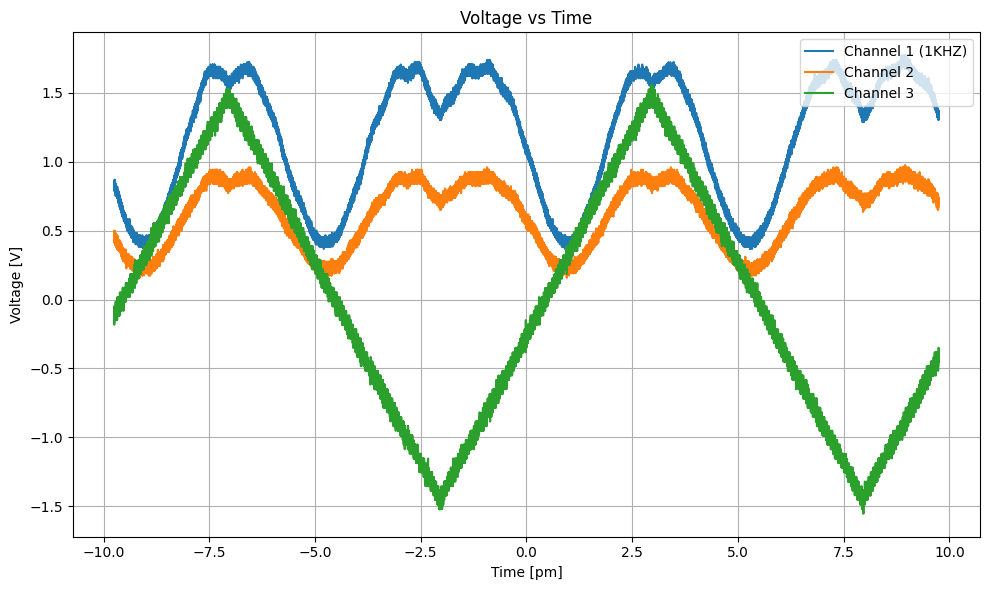

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# If the CSV is saved as 'example.csv', with two header rows
df = pd.read_csv('d7-scanafter.csv', header=1)  # use second row as header

# Convert 'second' to float if necessary
df['second'] = df['second'].astype(float)
df['Volt'] = df['Volt'].astype(float)
df['Volt.1'] = df['Volt.1'].astype(float)
df['Volt.2'] = df['Volt.2'].astype(float)

# Optional: convert time to picometers (1 s = 0.05 nm = 50 pm)
time_pm = df['second'] * 50

plt.figure(figsize=(10, 6))
plt.plot(time_pm, df['Volt'], label='Channel 1 (1KHZ)')
plt.plot(time_pm, df['Volt.1'], label='Channel 2')
plt.plot(time_pm, df['Volt.2'], label='Channel 3')

plt.xlabel('Time [pm]')
plt.ylabel('Voltage [V]')
plt.title('Voltage vs Time')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
